In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat

In [2]:
df = pd.read_csv("/home/rodolfoch/Computacional/Eval2/nasa1.csv",skiprows=0)

In [3]:
df.head()

,a,b,c,d,e,f,g
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN


In [4]:
df.columns= ['Año','mes','Ames','manchas','nlcs1','nñcs2','nada']

In [5]:
df.head(30)

,Año,mes,Ames,manchas,nlcs1,nñcs2,nada
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN
5,1749,6,1749.455,139.2,-1.0,-1,NaN
6,1749,7,1749.538,158.0,-1.0,-1,NaN
7,1749,8,1749.623,110.5,-1.0,-1,NaN
8,1749,9,1749.707,126.5,-1.0,-1,NaN
9,1749,10,1749.790,125.8,-1.0,-1,NaN


In [6]:
df.tail()

,Año,mes,Ames,manchas,nlcs1,nñcs2,nada
3208,2016,5,2016.373,52.1,4.7,810,NaN
3209,2016,6,2016.456,20.9,2.2,886,NaN
3210,2016,7,2016.540,32.5,3.7,910,NaN
3211,2016,8,2016.624,50.7,4.4,879,NaN
3212,2016,9,2016.708,44.7,3.8,742,NaN


In [7]:
df.dtypes

Año          int64
mes          int64
Ames       float64
manchas    float64
nlcs1      float64
nñcs2        int64
nada       float64
dtype: object

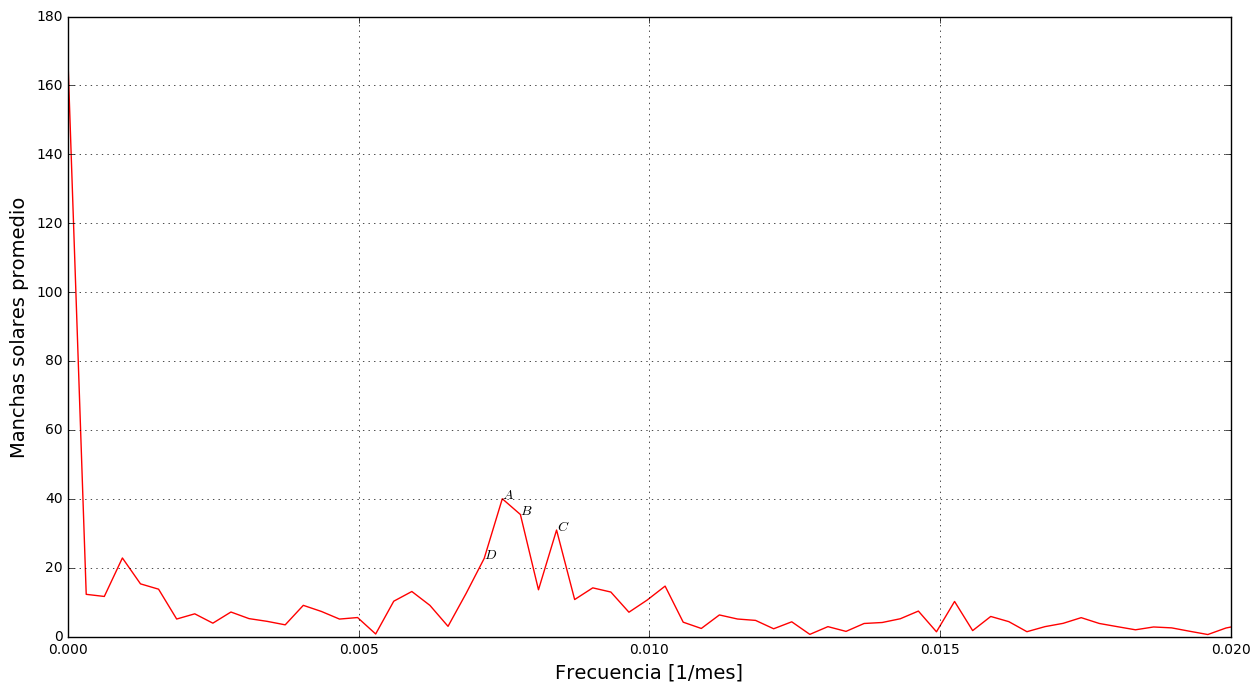

In [8]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N_d = 3213
# Separacion de tiempo entre cada medicion
T_d = 1
#aplicacion de la transformada de Fourier

x_hr=df['Ames']
y_hr = df["manchas"] 
yf_hr = fft(y_hr)
#Cambio de variable de tiempo a uno de frecuencias.
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot_hr = fftshift(yf_hr)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
graf = plt.plot(xf_hr, 2.0/N_d *abs(yplot_hr), 'r-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/mes]', fontsize=14)
plt.ylabel('Manchas solares promedio', fontsize=14)
#plt.title(, fontsize=15)


#Calando a ver si jala

plt.text(0.00746965452848, 39.9872332086, '$A$')
plt.text(0.00715841892312, 22.6781521056, '$D$')

plt.text(0.00778089013383, 35.4198320032, '$B$')

plt.text(0.00840336134454,30.9080378809 , '$C$')

plt.xlim(0.0,0.02)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [9]:
a = 2*np.absolute(yf_hr)/N_d #N_d es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier

In [10]:
print(np.where(a[:,]>10)) ##
b= a[a[:,]>10]
b

(array([   0,    1,    2,    3,    4,    5,   18,   19,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   32,   33,   49, 3164, 3180,
       3181, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3194,
       3195, 3208, 3209, 3210, 3211, 3212]),)


array([ 165.84712107,   12.2404616 ,   11.62644929,   22.79918361,
         15.28281214,   13.73590511,   10.24940903,   13.06489499,
         12.50737479,   22.67815211,   39.98723321,   35.419832  ,
         13.56290861,   30.90803788,   10.73240059,   14.12154193,
         12.90840658,   10.55344184,   14.6282459 ,   10.17270309,
         10.17270309,   14.6282459 ,   10.55344184,   12.90840658,
         14.12154193,   10.73240059,   30.90803788,   13.56290861,
         35.419832  ,   39.98723321,   22.67815211,   12.50737479,
         13.06489499,   10.24940903,   13.73590511,   15.28281214,
         22.79918361,   11.62644929,   12.2404616 ])

In [11]:
#deobo obtener un periodo de 132 meses (que le corresponden 11 años)  , que se pasará a años dividiendo por 12 meses
print( 'A')
print('Amplitud=',2.0*np.absolute(yf_hr[24,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +24),])
print('periodo=', 1/xf_hr[int(N_d/2 +24),])
print()


#modo A

# dividir el periodo entre 12 meses
#11.15

A
Amplitud= 39.9872332086
frecuencia= 0.00746965452848
periodo= 133.875



In [12]:
#D
print( 'D')
print('Amplitud=',2.0*np.absolute(yf_hr[23,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +23),])
print('periodo=', 1/xf_hr[int(N_d/2 +23),])
print()

#11.64

D
Amplitud= 22.6781521056
frecuencia= 0.00715841892312
periodo= 139.695652174



In [13]:
#B
print( 'B')
print('Amplitud=',2.0*np.absolute(yf_hr[25,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +25),])
print('periodo=', 1/xf_hr[int(N_d/2 +25),])
print()

#10.71

B
Amplitud= 35.4198320032
frecuencia= 0.00778089013383
periodo= 128.52



In [14]:
#C
print( 'C')
print('Amplitud=',2.0*np.absolute(yf_hr[27,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +27),])
print('periodo=', 1/xf_hr[int(N_d/2 +27),])
print()

#

C
Amplitud= 30.9080378809
frecuencia= 0.00840336134454
periodo= 119.0



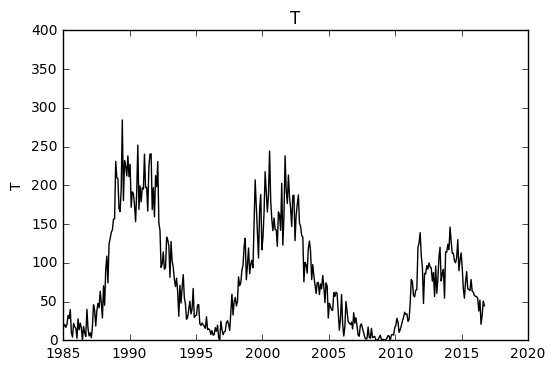

In [15]:
#esto es nomas para ver si se parecía

x=df[u'Ames']
y=df[u'manchas']
#mplt.plot(x,y)
#mplt.grid(True)
plt.xlabel('')
plt.ylabel('T')
plt.title('T')
plt.plot(x,y, color='black')

plt.xlim(1985,2020)

plt.show()